In [1]:
import rebound
import numpy as np
import ipywidgets

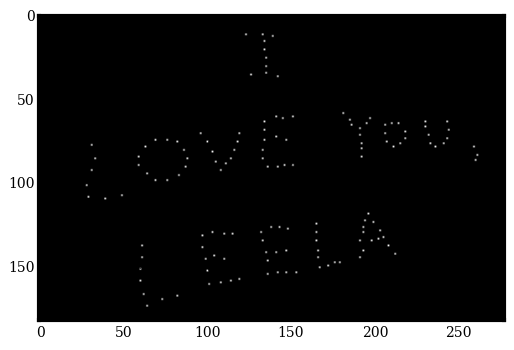

In [2]:
%matplotlib inline

#From http://stackoverflow.com/questions/36372068/how-to-get-x-y-coordinates-using-python
#
#Took picture of Leela's constellation from google

import cv2
import matplotlib.pyplot as plt

filename = 'Leelas_constellation.png'
img = cv2.imread(filename)
# plt.imshow(img)

img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #converting to grayscale
img=img.astype(np.uint8)
cp_img = img.copy()
img[cp_img == 255] = 0
img[cp_img == 0] = 1
plt.imshow(img, cmap='gray')

#get all non zero values
img = np.flipud(img)
coord=cv2.findNonZero(img)

In [3]:
sim = rebound.Simulation()
sim.integrator = "ias15" 
sim.collision = "direct"
sim.collision_resolve = "merge"

mass = 0.01

for i in range(len(coord)):
    sim.add(m=mass, x=coord[i][0][0], y=coord[i][0][1], z=0)    
    
sim.move_to_com()

In [4]:
sim.getWidget(size=(400,400))

In [8]:
import time

time.sleep(10)

for t in np.arange(0., 40., 0.5):
    sim.integrate(t)
    time.sleep(0.1)

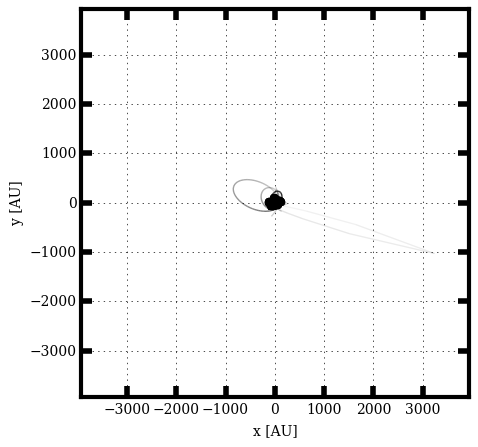

In [10]:
from IPython.display import display, clear_output
for i in range(10):
    sim.integrate(sim.t+0.1)
    fig = rebound.OrbitPlot(sim,unitlabel="[AU]")
    display(fig)
    plt.close(fig)
    clear_output(wait=True)